# Notebook for plotting star motion on AuxTel images.
Initially written 29 Jan 2020 by Craig Lage.

In [1]:
! eups list -s | grep lsst_distrib

lsst_distrib          19.0.0+18  	current w_2020_01 setup


In [2]:
import sys, os, glob, time
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import astropy.io.fits as pf

from lsst.daf.persistence import Butler
import lsst.afw.image as afwImage
from lsst.daf.persistence import Butler
from lsst.ip.isr.isrTask import IsrTask, IsrTaskConfig
from lsst.meas.algorithms import SourceDetectionTask
from lsst.pipe.tasks.characterizeImage import CharacterizeImageTask, CharacterizeImageConfig

import warnings
warnings.filterwarnings("ignore")

In [3]:
# Set up data path and isrTask and CharTask 
dataPath = '/mnt/dmcs/oods_butler_repo/repo/'
butler = Butler(dataPath)

isrConfig = IsrTask.ConfigClass()
isrConfig.doLinearize = False
isrConfig.doBias = True
isrConfig.doFlat = False
isrConfig.doDark = False
isrConfig.doFringe = False
isrConfig.doDefect = False
isrConfig.doAddDistortionModel = False
isrConfig.doWrite = False
isrTask = IsrTask(config=isrConfig)

charConfig = CharacterizeImageConfig()
charConfig.installSimplePsf.fwhm = 1.0
charConfig.doMeasurePsf = False
charConfig.doApCorr = False
charConfig.doDeblend = False
charConfig.repair.doCosmicRay = True
charConfig.repair.doInterpolate = False   
charConfig.detection.background.binSize = 32
charConfig.detection.minPixels = 100
charTask = CharacterizeImageTask(config=charConfig)

In [8]:
# Give the list of images
# You can either enter a list or give a starting and ending visit
#visitList =[2020012800335] # One of Patrick's images
#visitList = [2020012800351,2020012800352,2020012800353,2020012800354,\
#             2020012800355, 2020012800356] # Tiago's 5 moves

# The images below are for the displacements in AX and EL that Tiago was running
visitStart = 2020012800351
visitEnd = 2020012800356
# The images below are for successive images that Patrick was running
#visitStart = 2020012800325
#visitEnd = 2020012800328

visitList = []
visit = visitStart
while visit <= visitEnd:
    visitList.append(visit)
    visit += 1

print(visitList)

[2020012800351, 2020012800352, 2020012800353, 2020012800354, 2020012800355, 2020012800356]


In [9]:
# Now find the location of the brightest star
# Mask out the edges of the chip
minX = 500; maxX = 3500; minY = 500; maxY = 3500;
minFluxRatio = 0.99
xCoords = []; yCoords = []
for visitId in visitList:
    dataId = {'visit': visitId}
    dataRef = butler.dataRef('raw', **dataId)
    postIsrExp = isrTask.runDataRef(dataRef).exposure
    charResult = charTask.run(postIsrExp)
    starCatalog = charResult.sourceCat
    #print(len(starCatalog))
    select = ((starCatalog['base_SdssCentroid_x'] >= minX) & (starCatalog['base_SdssCentroid_x'] <= maxX) &
                    (starCatalog['base_SdssCentroid_y'] >= minY) & (starCatalog['base_SdssCentroid_y'] <= maxY))
    starCatalog  = starCatalog.subset(select)  # Mask out the edges, where there is some weird stuff
    numStars = len(starCatalog)
    if numStars < 1:
        print("No stars found image %d"%visitId)
        continue
    maxFlux = np.nanmax(starCatalog['base_SdssShape_instFlux'])
    select = starCatalog['base_SdssShape_instFlux'] > maxFlux * minFluxRatio
    starCatalog  = starCatalog.subset(select) # Grab only the highest flux spot
    numStars = len(starCatalog)
    if numStars < 1:
        print("No stars found image %d"%visitId)
        continue
    elif numStars > 1:
        print("Didn't find a unique star.  Skipping image %d"%visitId)
    else:
        x = starCatalog['base_SdssCentroid_x'][0]
        y = starCatalog['base_SdssCentroid_y'][0]
        print("Found a unique star in image %d at (%.2f, %.2f)"%(visitId,x,y))
        xCoords.append(x)
        yCoords.append(y)
#print(xCoords, yCoords)


AT_O_20200128_000351: Dark time less than exposure time. Setting dark time to the exposure time.
Ignoring Error calculating property 'boresight_airmass' using translator <class 'lsst.obs.lsst.translators.latiss.LsstLatissTranslator'>: "Could not find ['AMSTART'] in header"
Ignoring Error calculating property 'boresight_rotation_angle' using translator <class 'lsst.obs.lsst.translators.latiss.LsstLatissTranslator'>: "Could not find ['ROTANGLE'] in header"


Found a unique star in image 2020012800351 at (2672.64, 1290.60)


AT_O_20200128_000352: Dark time less than exposure time. Setting dark time to the exposure time.
Ignoring Error calculating property 'boresight_airmass' using translator <class 'lsst.obs.lsst.translators.latiss.LsstLatissTranslator'>: "Could not find ['AMSTART'] in header"
Ignoring Error calculating property 'boresight_rotation_angle' using translator <class 'lsst.obs.lsst.translators.latiss.LsstLatissTranslator'>: "Could not find ['ROTANGLE'] in header"


Found a unique star in image 2020012800352 at (2650.88, 1326.16)


AT_O_20200128_000353: Dark time less than exposure time. Setting dark time to the exposure time.
Ignoring Error calculating property 'boresight_airmass' using translator <class 'lsst.obs.lsst.translators.latiss.LsstLatissTranslator'>: "Could not find ['AMSTART'] in header"
Ignoring Error calculating property 'boresight_rotation_angle' using translator <class 'lsst.obs.lsst.translators.latiss.LsstLatissTranslator'>: "Could not find ['ROTANGLE'] in header"


Found a unique star in image 2020012800353 at (2905.93, 1432.15)


AT_O_20200128_000354: Dark time less than exposure time. Setting dark time to the exposure time.
Ignoring Error calculating property 'boresight_airmass' using translator <class 'lsst.obs.lsst.translators.latiss.LsstLatissTranslator'>: "Could not find ['AMSTART'] in header"
Ignoring Error calculating property 'boresight_rotation_angle' using translator <class 'lsst.obs.lsst.translators.latiss.LsstLatissTranslator'>: "Could not find ['ROTANGLE'] in header"


Found a unique star in image 2020012800354 at (2367.92, 1211.73)


AT_O_20200128_000355: Dark time less than exposure time. Setting dark time to the exposure time.
Ignoring Error calculating property 'boresight_airmass' using translator <class 'lsst.obs.lsst.translators.latiss.LsstLatissTranslator'>: "Could not find ['AMSTART'] in header"
Ignoring Error calculating property 'boresight_rotation_angle' using translator <class 'lsst.obs.lsst.translators.latiss.LsstLatissTranslator'>: "Could not find ['ROTANGLE'] in header"


Found a unique star in image 2020012800355 at (2558.72, 1577.92)


AT_O_20200128_000356: Dark time less than exposure time. Setting dark time to the exposure time.
Ignoring Error calculating property 'boresight_airmass' using translator <class 'lsst.obs.lsst.translators.latiss.LsstLatissTranslator'>: "Could not find ['AMSTART'] in header"
Ignoring Error calculating property 'boresight_rotation_angle' using translator <class 'lsst.obs.lsst.translators.latiss.LsstLatissTranslator'>: "Could not find ['ROTANGLE'] in header"


Found a unique star in image 2020012800356 at (2791.23, 1041.03)


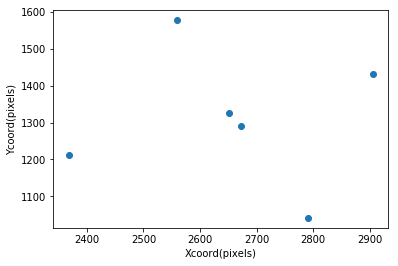

In [10]:
# Plot the star track
figure = plt.figure()
plt.scatter(xCoords, yCoords)
#plt.plot(xCoords, yCoords, marker='x')
plt.xlabel("Xcoord(pixels)")
plt.ylabel("Ycoord(pixels)")
plt.savefig("/home/saluser/develop/ts_notebooks/cslage/graphs/AltEz_Dithers.png")